### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [ ]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [ ]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdateStockDatabase()

* 建立「解盤」物件    

In [ ]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤前**：[盤前觀點](https://www.facebook.com/kevinyang20180801/posts/pfbid0KPVafzwjjfu1edGbZLPUNNTp37bVoMiG6g7f5TTSEbFrF4XCXUvFta7W2SRwNTX9l)  
> 整體仍在支撐與壓力區間內震盪。  
> 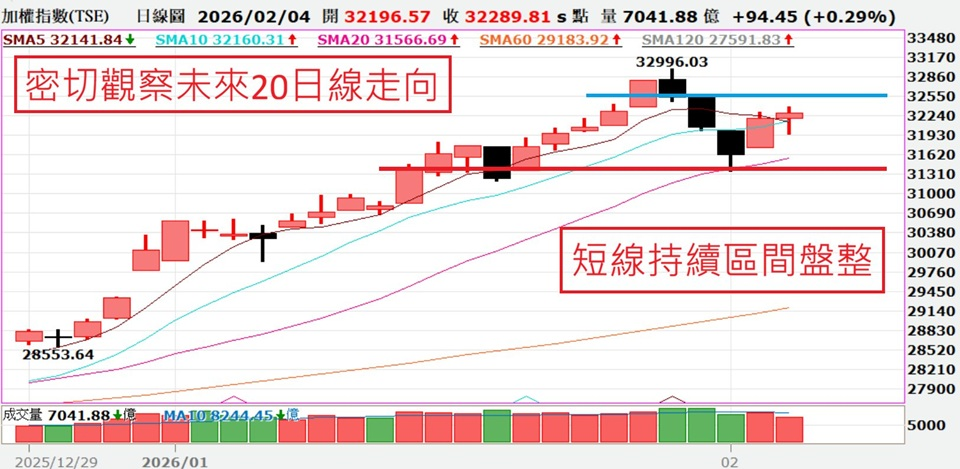  

In [ ]:
# 壓力線與支撐線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2026-01-26'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2026-01-30']['Open']
    
    # 支撐線
    support_line_start_date = '2026-01-15'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2026-01-16']['Close']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.0,2.0]
    
    colors=['xkcd:electric blue','xkcd:red','xkcd:red']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
# 收盤：壓力線與支撐線
image = mysys.DrawOnKlineChart('TAIEX','2026-01-06','2026-02-05',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [ ]:
results = analysis.screener()

In [ ]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

* 篩選結果  
  - 倉和(6538)：盤整觀察  
    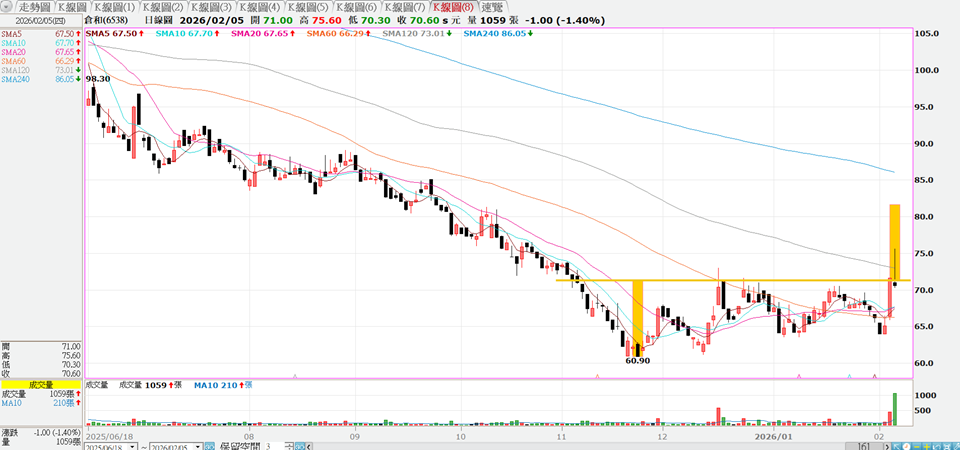  
  - 安可(3615)：多頭回檔  
    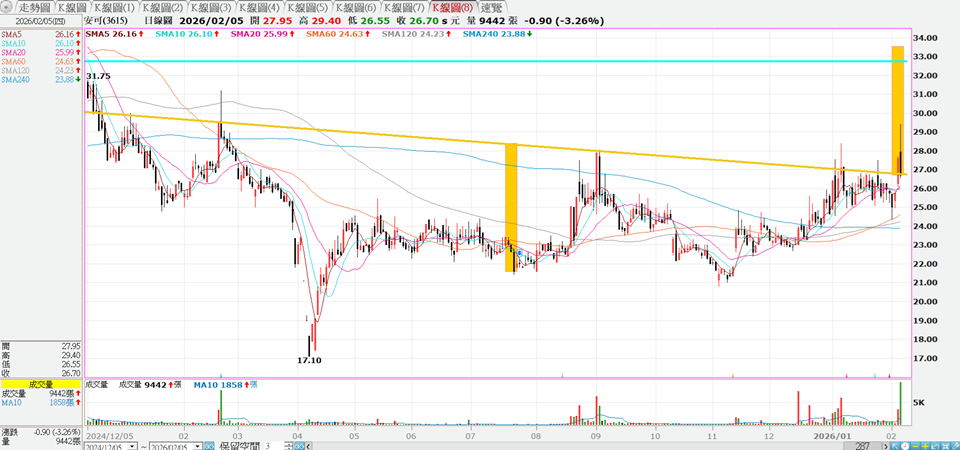  
  - 光鋐(4956)：穩健續漲  
    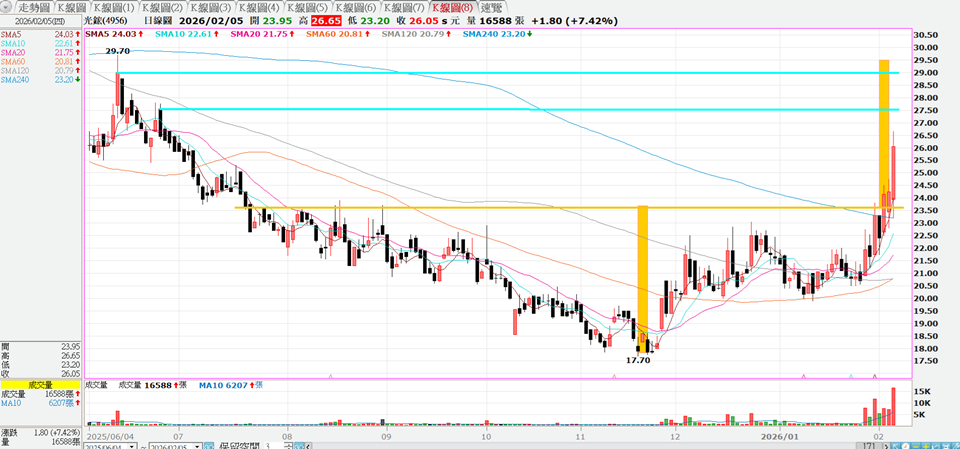  
  - 達能(3686)：穩健續漲  
    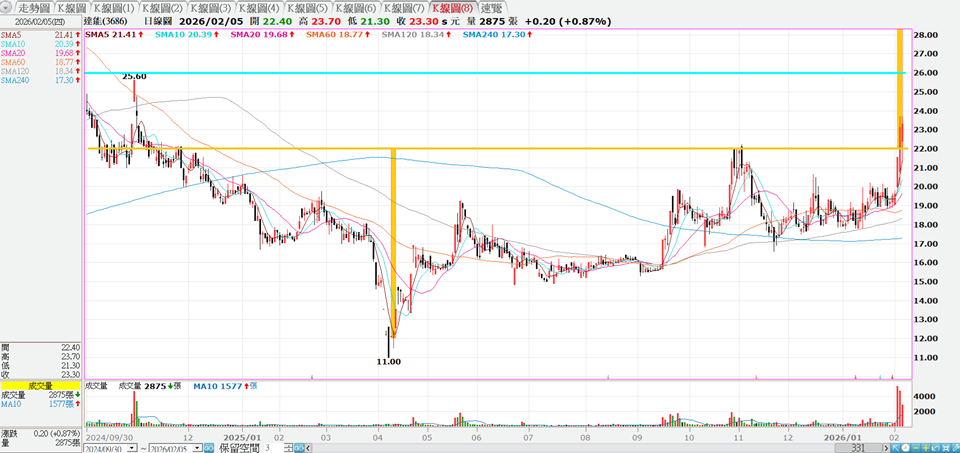  

* 觀察股列表  
  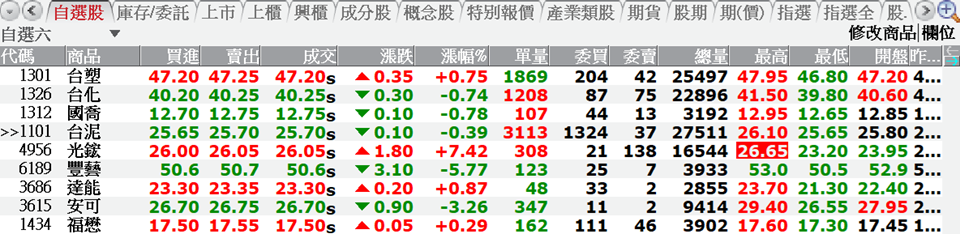  

### 個股解盤  

* 台泥(1101)  
  看法：持續在前波壓力與頸線間盤整，因此這檔先追蹤至今日。     

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'1101')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-04'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-07-30']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-19'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('1101','2025-03-03','2026-02-05',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-3974)：外資小賣(-6217)、投信中立(-28)、自營大買(+2271)。  
主力小買(+2782)。  
分公司買賣家數差分散(-19)。  
融資○○( )、融券○○( )。  

* 台塑(1301)  
  看法：弱勢反彈，但關鍵支撐都有守住。這檔會再追蹤一到兩個交易日。    

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'1301')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-09-10'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-04']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-01-09'
    bottom_price = range_prices.loc['2025-01-09']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-26'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('1301','2024-04-11','2026-02-05',line_drawing_callback)
display(image)

籌碼面：  
法人小買(+2675)：外資小買(+3323)、投信中立(-5)、自營小賣(-643)。  
主力小買(+2089)。  
分公司買賣家數差分散(-2)。  
融資○○( )、融券○○( )。  

* 台化(1326)  
  看法：短線轉弱，進入狹幅盤整區間。這檔會再追蹤一到兩個交易日。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'1326')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-11-11'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-04']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-06-23'
    bottom_price = range_prices.loc['2025-06-23']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-26'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('1326','2024-04-11','2026-02-05',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-5655)：外資大賣(-4899)、投信中立(0)、自營大賣(-756)。  
主力小賣(-3599)。  
分公司買賣家數差分散(-81)。  
融資○○( )、融券○○( )。  